C:\Users\shahr\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Root Mean Squared Error (RMSE): 387.8896388404849


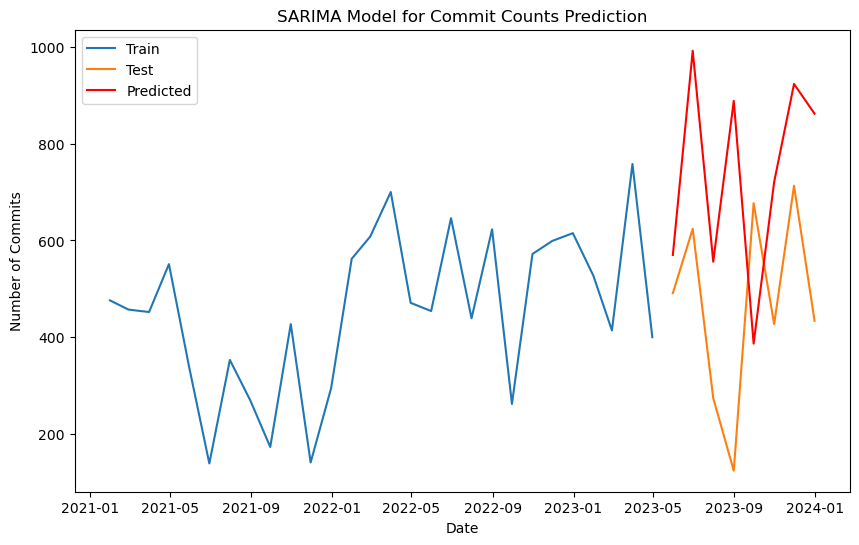

Predicted Commit Counts for December 2024: 483.6867607039088


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Sample data creation (replace this with your actual data loading)
date_rng = pd.date_range(start='2021-01-01', end='2023-12-31', freq='M')
commit_counts = np.random.randint(100, 800, size=(len(date_rng)))

commit_df = pd.DataFrame({'commit_date': date_rng, 'commit_count': commit_counts})
commit_df['commit_date'] = pd.to_datetime(commit_df['commit_date'], format='%Y-%m-%d')
commit_df = commit_df.set_index('commit_date')

# Set the frequency of the date index
commit_df = commit_df.asfreq('M')

# Feature Engineering (you may need to add more features based on your dataset)
commit_df['year'] = commit_df.index.year
commit_df['month'] = commit_df.index.month

# Train/test split
train_size = int(len(commit_df) * 0.8)
train, test = commit_df[:train_size], commit_df[train_size:]

# SARIMA model
order = (1, 1, 1)  # Non-seasonal order
seasonal_order = (1, 1, 1, 12)  # Seasonal order (12 for monthly data)
model = SARIMAX(train['commit_count'], order=order, seasonal_order=seasonal_order)
fit_model = model.fit(disp=False)

# Predict
predictions = fit_model.get_forecast(steps=len(test))
predicted_commit_counts = predictions.predicted_mean

# Evaluate the model
mse = mean_squared_error(test['commit_count'], predicted_commit_counts)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['commit_count'], label='Train')
plt.plot(test.index, test['commit_count'], label='Test')
plt.plot(test.index, predicted_commit_counts, label='Predicted', color='red')
plt.title('SARIMA Model for Commit Counts Prediction')
plt.xlabel('Date')
plt.ylabel('Number of Commits')
plt.legend()
plt.show()

# Predict for December 2024
forecast_steps = 12
forecast = fit_model.get_forecast(steps=forecast_steps)
forecasted_commit_counts = forecast.predicted_mean

# Print the predicted commit counts for December 2024
print(f"Predicted Commit Counts for December 2024: {forecasted_commit_counts[-1]}")
